In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from PIL import Image,ImageOps,ImageEnhance,ImageFilter
import tensorflow_datasets as tfds


In [2]:
# Load MNIST dataset
#trainin data
mnist_train = tfds.load('mnist', split='train', as_supervised=True) 

#testing data 
mnist_test = tfds.load('mnist', split='test', as_supervised=True)

# Convert the dataset to NumPy arrays
def convert_to_numpy(dataset):
    images, labels = [], []
    for image, label in tfds.as_numpy(dataset):
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)

X_train, y_train = convert_to_numpy(mnist_train)
X_test, y_test = convert_to_numpy(mnist_test)

# Flatten the images from 28x28 to 784 features that is 2d array 784 columns x no of images
X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

# Normalize the pixel values to the range [0, 1] z= s-min/max-min 
X_train = X_train / 255.0
X_test = X_test / 255.0


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Reshape MNIST data for CNN input (Add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32')

# Build the CNN model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the CNN model
model.fit(X_train, y_train, epochs=5, validation_split=0.1, batch_size=64)

# Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'\nTest Accuracy: {test_acc:.4f}')

# Predict on test set
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)  # Convert softmax probabilities to labels


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8782 - loss: 0.4130 - val_accuracy: 0.9800 - val_loss: 0.0747
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9823 - loss: 0.0599 - val_accuracy: 0.9857 - val_loss: 0.0503
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9882 - loss: 0.0378 - val_accuracy: 0.9873 - val_loss: 0.0434
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9911 - loss: 0.0290 - val_accuracy: 0.9857 - val_loss: 0.0442
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9925 - loss: 0.0232 - val_accuracy: 0.9877 - val_loss: 0.0427

Test Accuracy: 0.9893
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


NameError: name 'processed_image' is not defined

Accuracy: 0.9417
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.94      0.92      0.93      1032
           3       0.93      0.94      0.93      1010
           4       0.92      0.95      0.94       982
           5       0.92      0.91      0.92       892
           6       0.95      0.96      0.96       958
           7       0.95      0.93      0.94      1028
           8       0.93      0.91      0.92       974
           9       0.94      0.91      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



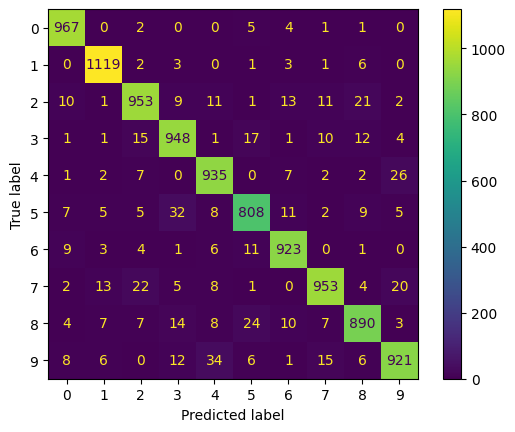

In [33]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Display a classification report
print(metrics.classification_report(y_test, y_pred))

# Plot a confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [6]:
import cv2


In [7]:
def display_image(image):
    # Display the image in a window
    cv2.imshow('Captured Image', image)

    # Wait for a key press indefinitely or for a specified amount of time in milliseconds
    cv2.waitKey(0)

    # Close all OpenCV windows
    cv2.destroyAllWindows()


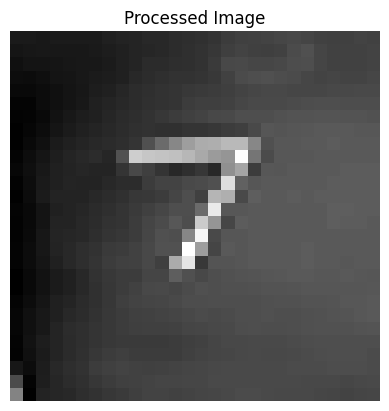

In [9]:
#captured image for checking

def preprocess_image(image_path):
    # Open the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(2.0)  # Adjust the factor as needed

    # Apply Gaussian Blur for noise reduction
    img = img.filter(ImageFilter.GaussianBlur(radius=1))
    
    # Resize the image to 28x28 pixels
    img = img.resize((28, 28), Image.LANCZOS)

    # Invert the image (MNIST digits are white on black)
    img = np.invert(img)

    # Convert the image to a NumPy array
    img_array = np.array(img)

    # Flatten the image to a 1D array of 784 elements
    img_array = img_array.flatten()

    # Normalize the pixel values to the range [0, 1]
    img_array = img_array / 255.0

    return img_array

# Example usage
custom_image = preprocess_image('C:\\Users\\mynam\\OneDrive\\Desktop\\digit.jpg')
image_2d = custom_image.reshape(28, 28)

# Display the image using matplotlib
plt.imshow(image_2d, cmap='gray')
plt.title('Processed Image')
plt.axis('off')  # Hide axis labels
plt.show()
custom_image = custom_image.reshape(1, -1)
# Reshape for prediction


In [12]:
prediction = model.predict(custom_image.reshape(1, 28, 28, 1))
print(f'Predicted digit: {np.argmax(prediction)}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted digit: 7


In [ ]:
#open web cam to capture live image for predictiom

def capture_image_from_webcam():
    # Initialize the webcam
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("Cannot access the webcam")

    # Capture a single frame
    ret, frame = cap.read()
    if not ret:
        raise IOError("Failed to capture image")

    # Release the webcam and close windows
    cap.release()
    cv2.destroyAllWindows()
    display_image(frame)

    # Convert the captured frame to RGB (OpenCV uses BGR by default)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Convert the frame to a PIL Image
    img = Image.fromarray(frame_rgb)

    return img

# Capture the image
captured_image = capture_image_from_webcam()


In [ ]:
def preprocess_image(img):
    # Convert to grayscale
    img = img.convert('L')

    # Resize the image to 28x28 pixels
    img = img.resize((28, 28), Image.LANCZOS)

    # Invert the image (MNIST digits are white on black)
    img = np.invert(img)

    # Convert the image to a NumPy array
    img_array = np.array(img)

    # Flatten the image to a 1D array of 784 elements
    img_array = img_array.flatten()

    # Normalize the pixel values to the range [0, 1]
    img_array = img_array / 255.0

    return img_array

# Preprocess the captured image
processed_image = preprocess_image(captured_image)


In [ ]:
# Reshape the image for prediction
processed_image = processed_image.reshape(1, -1)

# Predict the digit using the trained classifier
prediction = clf.predict(processed_image)
print(f'Predicted digit: {prediction[0]}')


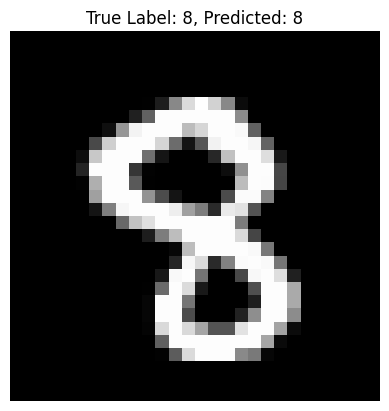

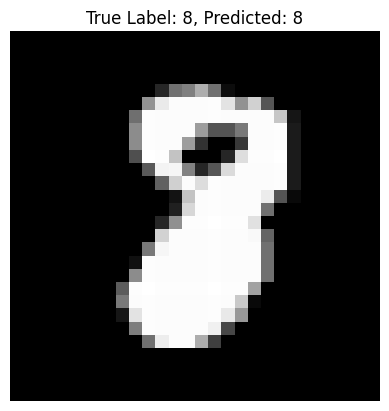

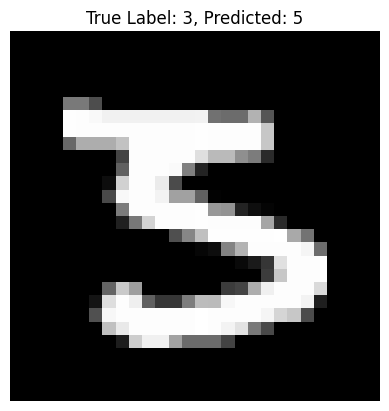

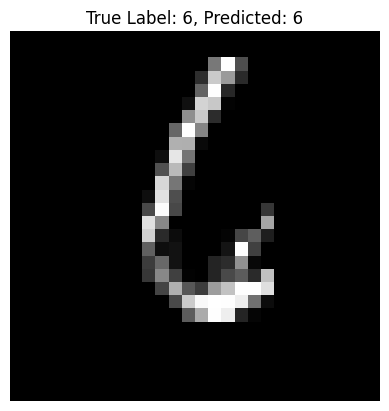

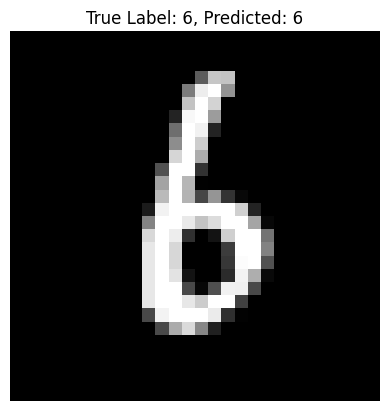

In [19]:
# Select a few samples from the test set
samples = np.random.choice(len(X_test), 5)

for index in samples:
    image = X_test[index].reshape(28, 28)
    true_label = y_test[index]
    predicted_label = y_pred[index]

    plt.imshow(image, cmap='gray')
    plt.title(f'True Label: {true_label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()
